 ### Creating Customer Segments

## Getting Started

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display 


import visuals as vs


%matplotlib inline


try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

In [2]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
a = data.describe()
a.round(decimals = 0)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.0,440.0,440.0,440.0,440.0,440.0
mean,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
std,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
min,3.0,55.0,3.0,25.0,3.0,3.0
25%,3128.0,1533.0,2153.0,742.0,257.0,408.0
50%,8504.0,3627.0,4756.0,1526.0,816.0,966.0
75%,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
max,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [4]:
indices = [1, 27, 413]

        
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,14276,803,3045,485,100,518
2,4983,4859,6633,17866,912,2435


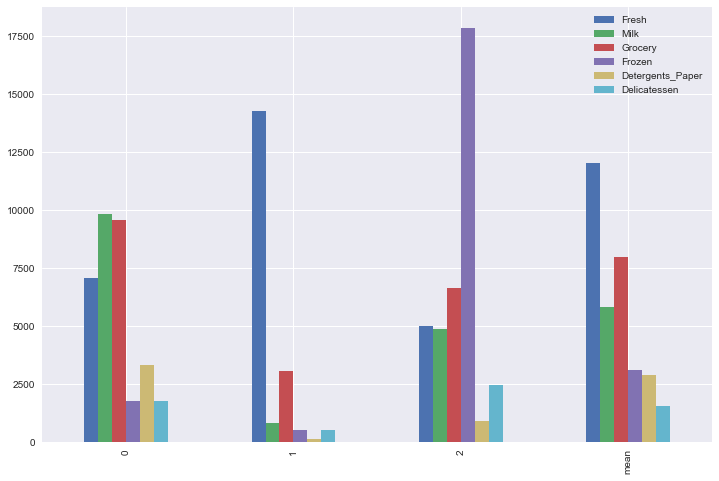

In [5]:
import seaborn as sns

mean_data = data.describe().loc['mean']
samples_plus_mean = samples.append(mean_data)

samples_plus_mean.plot(kind = 'bar', figsize=(12,8))


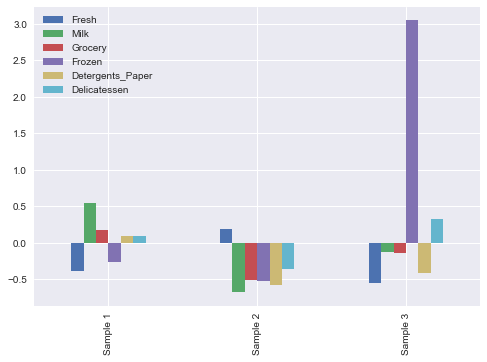

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

samples_cpy = samples.copy()
samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

labels = ['Sample 1','Sample 2','Sample 3']
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

**Exploring the samples**

Index 0 


Spending on milk, grocery, detergents and delicatessen are higher than average of spending on them.
Spending on fresh and frozen food are Lower than average.
Sounds it can be a café that also serves ready- made food.

Index 1

Spending on fresh food is higher than average and spending on rest of the categories are less than average.
It can be a fresh food retailer.

Index 2

Spending on frozen food is a lot higher than average; spending on delicatessen is also higher than average but not as much as frozen. Spending on rest of the categories is lower than average of each category.
This can be fast food restaurant.


### Implementation: Feature Relevance

**I used 2 methods:**

1. Found out the most correlated features using correlation matrix.

2. Trained a supervised regression learner on a subset of the data with one feature removed, and then scored how well that model can predict the removed feature.

Both methods suggests "Detergents_Paper" is a good feature to be removed from the data:

In [7]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


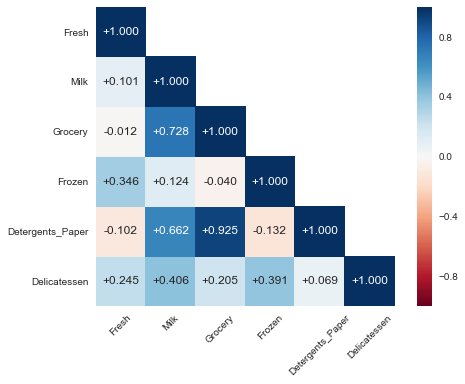

In [9]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

dep_variables = list(data.columns)

for var in dep_variables:
    
    new_datA = data.drop([var], axis=1)
    independent_var = pd.DataFrame(data.loc[:,var])
    X_train1, X_test1, y_train1, y_test1 = train_test_split (new_datA, independent_var, test_size=0.25, random_state=2)
    
    regressor1 = DecisionTreeRegressor(random_state=2)
    regressor1.fit(X_train1, y_train1)
    
    scorE = regressor1.score( X_test1, y_test1)
    print('R2 scorE for {} as dependent variable: {}'.format(var, scorE))

R2 scorE for Fresh as dependent variable: -0.500889898435
R2 scorE for Milk as dependent variable: -0.152331262727
R2 scorE for Grocery as dependent variable: 0.514349780217
R2 scorE for Frozen as dependent variable: -5.12627908664
R2 scorE for Detergents_Paper as dependent variable: 0.5370246003
R2 scorE for Delicatessen as dependent variable: -2.18131176357


### Visualize Feature Distributions

C:\Users\tarkan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


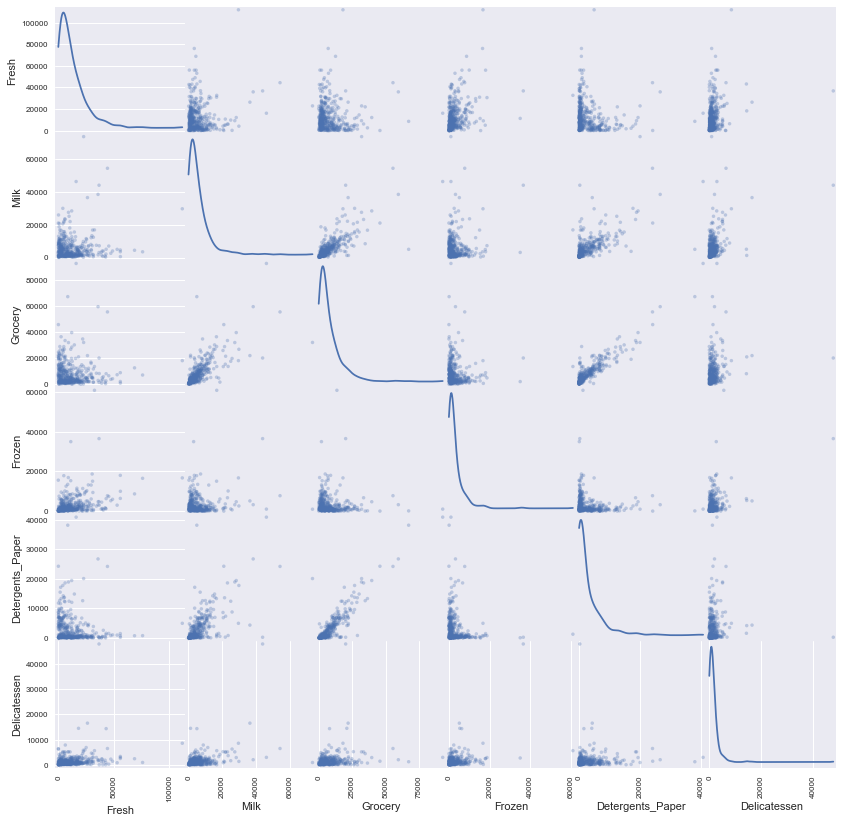

In [12]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,14), diagonal = 'kde');

(array([ 267.,  109.,   38.,   16.,    4.,    3.,    2.,    0.,    0.,    1.]),
 array([  3.00000000e+00,   1.12178000e+04,   2.24326000e+04,
          3.36474000e+04,   4.48622000e+04,   5.60770000e+04,
          6.72918000e+04,   7.85066000e+04,   8.97214000e+04,
          1.00936200e+05,   1.12151000e+05]),
 <a list of 10 Patch objects>)

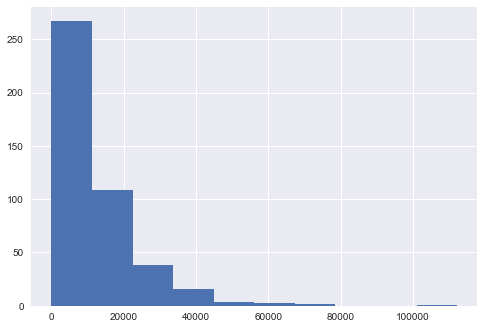

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.hist(x = data['Fresh'])

(array([ 335.,   74.,   17.,    6.,    3.,    2.,    1.,    1.,    0.,    1.]),
 array([  5.50000000e+01,   7.39930000e+03,   1.47436000e+04,
          2.20879000e+04,   2.94322000e+04,   3.67765000e+04,
          4.41208000e+04,   5.14651000e+04,   5.88094000e+04,
          6.61537000e+04,   7.34980000e+04]),
 <a list of 10 Patch objects>)

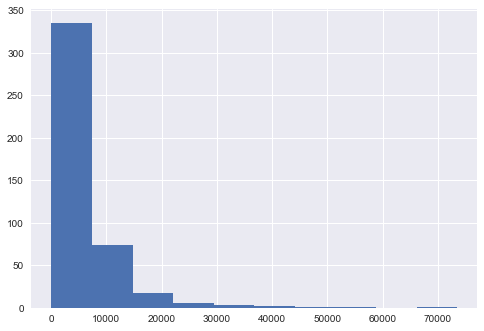

In [14]:
plt.hist(x = data['Milk'])

(array([ 311.,   82.,   32.,    9.,    2.,    1.,    1.,    1.,    0.,    1.]),
 array([  3.00000000e+00,   9.28070000e+03,   1.85584000e+04,
          2.78361000e+04,   3.71138000e+04,   4.63915000e+04,
          5.56692000e+04,   6.49469000e+04,   7.42246000e+04,
          8.35023000e+04,   9.27800000e+04]),
 <a list of 10 Patch objects>)

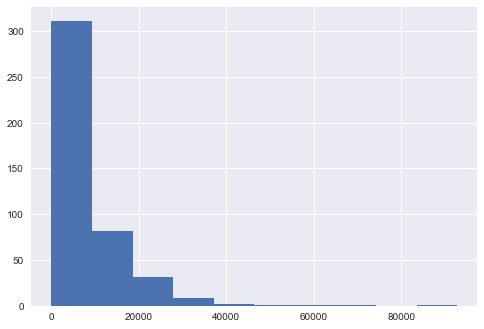

In [15]:
plt.hist(x = data['Grocery'])

(array([ 379.,   45.,   12.,    1.,    0.,    1.,    1.,    0.,    0.,    1.]),
 array([  2.50000000e+01,   6.10940000e+03,   1.21938000e+04,
          1.82782000e+04,   2.43626000e+04,   3.04470000e+04,
          3.65314000e+04,   4.26158000e+04,   4.87002000e+04,
          5.47846000e+04,   6.08690000e+04]),
 <a list of 10 Patch objects>)

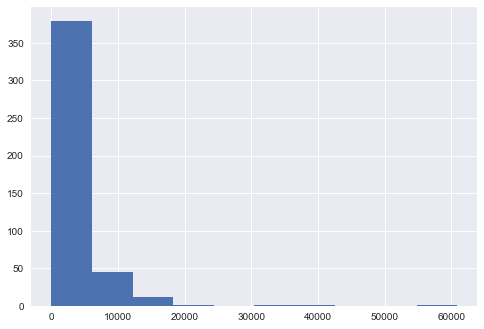

In [16]:
plt.hist(x = data['Frozen'])

(array([ 335.,   68.,   16.,   10.,    6.,    2.,    1.,    0.,    0.,    2.]),
 array([  3.00000000e+00,   4.08540000e+03,   8.16780000e+03,
          1.22502000e+04,   1.63326000e+04,   2.04150000e+04,
          2.44974000e+04,   2.85798000e+04,   3.26622000e+04,
          3.67446000e+04,   4.08270000e+04]),
 <a list of 10 Patch objects>)

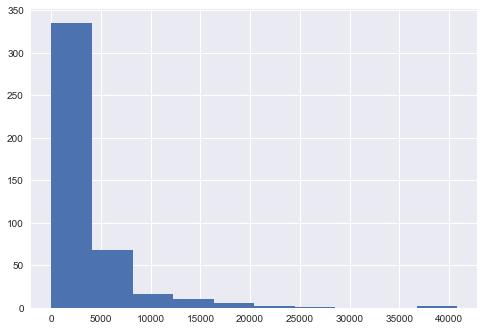

In [17]:
plt.hist(x = data['Detergents_Paper'])

(array([ 419.,   17.,    1.,    2.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  3.00000000e+00,   4.79700000e+03,   9.59100000e+03,
          1.43850000e+04,   1.91790000e+04,   2.39730000e+04,
          2.87670000e+04,   3.35610000e+04,   3.83550000e+04,
          4.31490000e+04,   4.79430000e+04]),
 <a list of 10 Patch objects>)

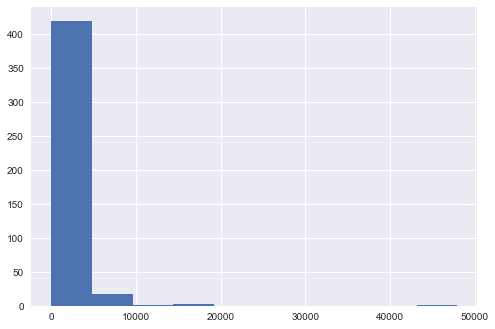

In [18]:
plt.hist(x = data['Delicatessen'])

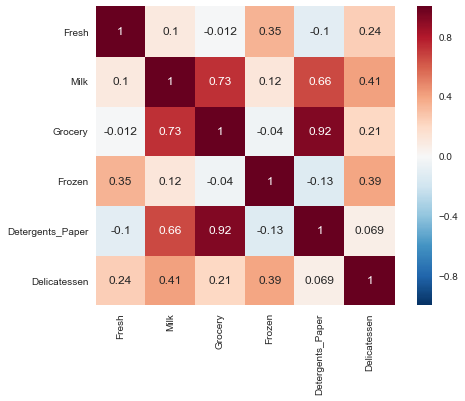

In [19]:
sns.heatmap(data.corr(), annot=True, square=True)

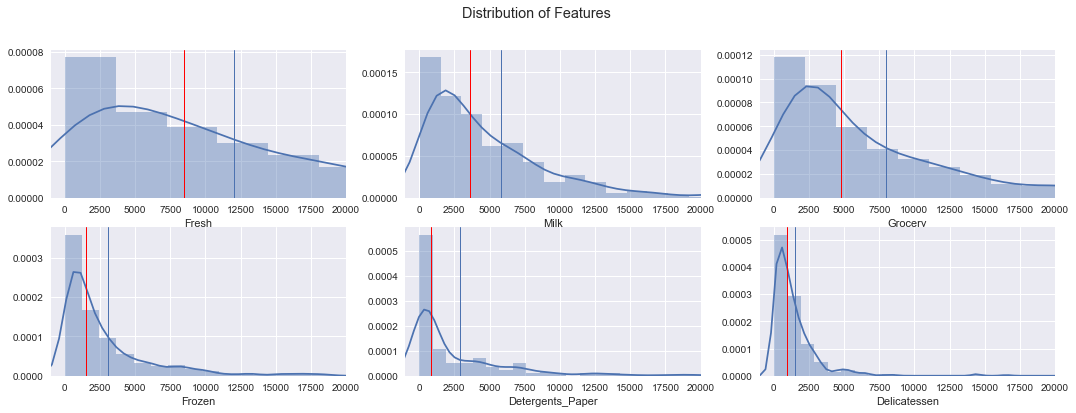

In [20]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

In order to get a better understanding of the data I decided to plot the histogram of each feature individually. As it can be seen, none of the features have a normal distribution but it seems that their logaritmic has a normal distribution (log-normal distribution). They all are concentrated near 0 and they all contain outliers.This also can be seen in the scatter plot (Datas are skewed to the left and they contain outliers.) This mean data needs to be scaled.

## Data Preprocessing

### Implementation: Feature Scaling

C:\Users\tarkan\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


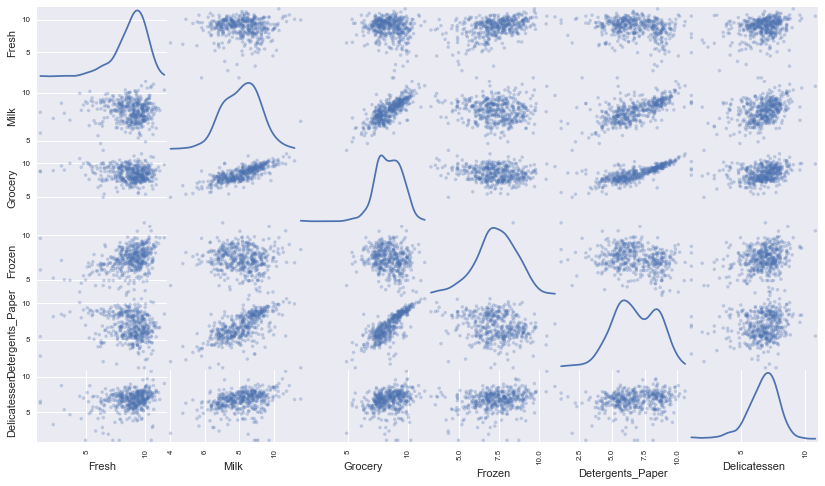

In [21]:
log_data = np.log(data)

log_samples = np.log(samples)

pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

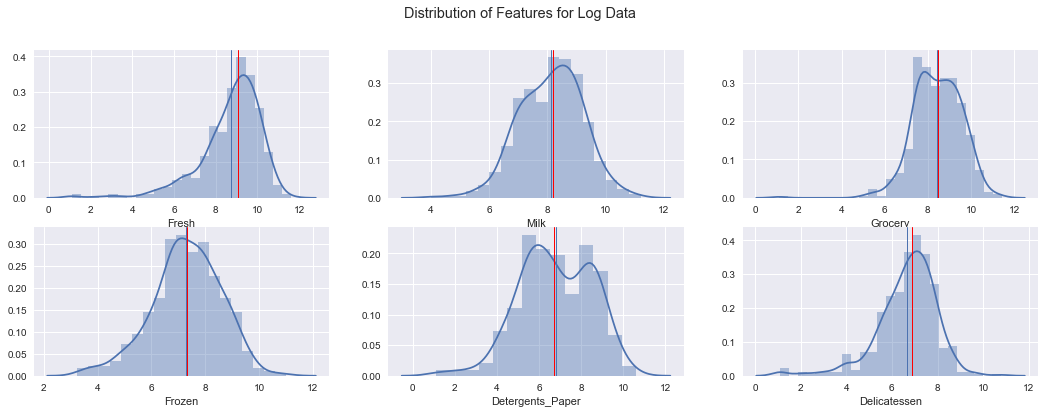

In [22]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature as it can be seen is much more normal.

In [23]:
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975
2,8.513787,8.488588,8.799812,9.790655,6.815640,7.797702


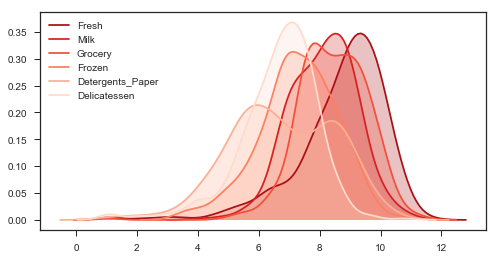

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Implementation: Outlier Detection

In [26]:
from collections import Counter



for feature in log_data.keys():
    

    Q1 = np.percentile(log_data[feature], 25)
    
    Q3 = np.percentile(log_data[feature], 75)
    
    # Used the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers=(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display(outliers)

outlier_rows=[]
outlier_rows.extend(outliers.index.values)
print outlier_rows
    

outliers  = [128, 65, 66, 75, 154]

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


## Feature Transformation

### Implementation: PCA

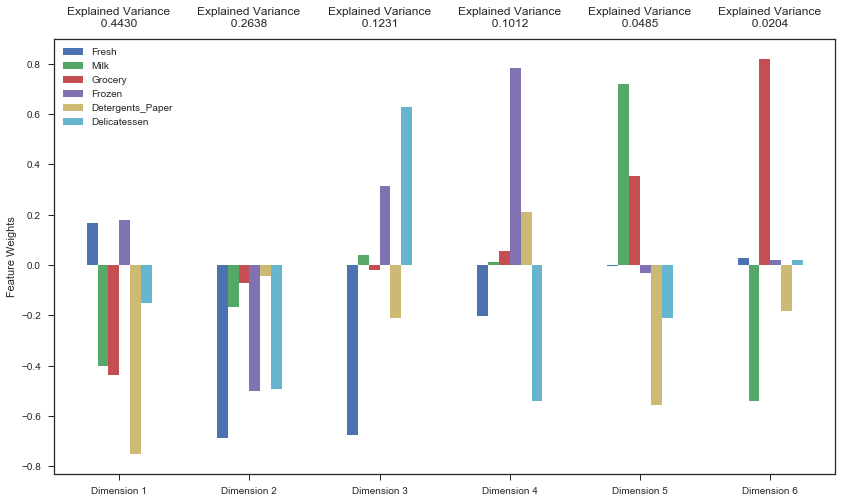

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(good_data)

pca_samples = pca.transform(log_samples)

pca_results = vs.pca_results(good_data, pca)

In [25]:
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

As it can be seen; 70.68 percent of the variance in the data is explained by the first and second principle components and 93.11 percent of the variance in the data is explained by the first four principle components.

### Observation

In [28]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,2.4162,0.6069,-0.7652,-1.3209,0.1614,0.8089
2,-0.0741,-1.6911,1.6461,1.4172,0.0587,0.1461


### Implementation: Dimensionality Reduction

In [29]:
pca_2= PCA(n_components = 2)
pca_2.fit(good_data)

reduced_data = pca_2.transform(good_data)

pca_samples = pca_2.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation

In [30]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,2.4162,0.6069
2,-0.0741,-1.6911


## Visualizing a Biplot

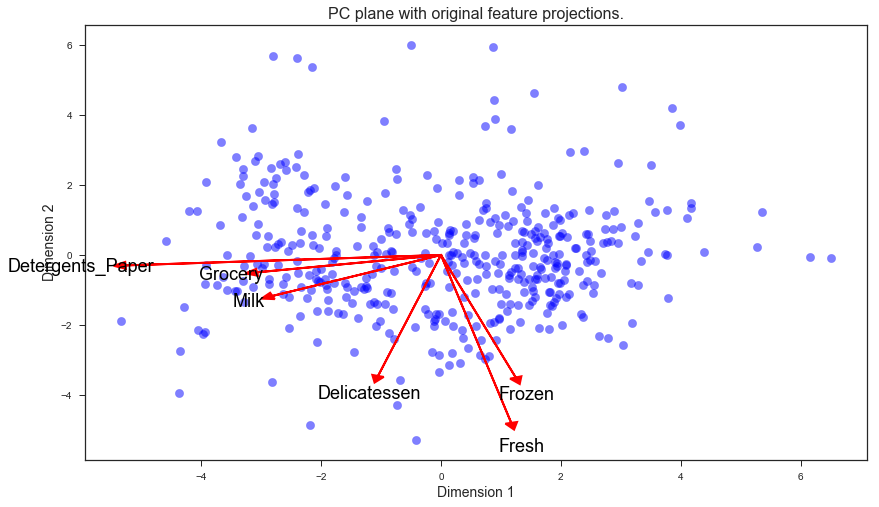

In [31]:
vs.biplot(good_data, reduced_data, pca)

## Clustering

### Implementation: Creating Clusters

Clustering method: GMM and KMeans

Scoring methid: Silhouette coefficient 

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_cluster=[2,3,4,5,6,7,8,9,10]

for i in n_cluster:
    clusterer = GaussianMixture(n_components= i).fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.means_
    
    sample_preds = clusterer.predict(pca_samples)

    score = silhouette_score(reduced_data, preds)
    
    print " for {} clusters the silhouette_score is: {}".format(i, score)

 for 2 clusters the silhouette_score is: 0.421916846463
 for 3 clusters the silhouette_score is: 0.404547778638
 for 4 clusters the silhouette_score is: 0.270107592852
 for 5 clusters the silhouette_score is: 0.24606593657
 for 6 clusters the silhouette_score is: 0.334943495367
 for 7 clusters the silhouette_score is: 0.301065062066
 for 8 clusters the silhouette_score is: 0.314843991251
 for 9 clusters the silhouette_score is: 0.302444773697
 for 10 clusters the silhouette_score is: 0.299348823776


In [33]:
from sklearn.cluster import KMeans

for i in n_cluster:
    
    clusterer = KMeans(n_clusters= i).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data, preds)
    
    print " for {} clusters the silhouette_score is: {}".format(i, score)

 for 2 clusters the silhouette_score is: 0.426281015469
 for 3 clusters the silhouette_score is: 0.397423420008
 for 4 clusters the silhouette_score is: 0.331245916061
 for 5 clusters the silhouette_score is: 0.349308724099
 for 6 clusters the silhouette_score is: 0.361798752588
 for 7 clusters the silhouette_score is: 0.358158577481
 for 8 clusters the silhouette_score is: 0.365704703069
 for 9 clusters the silhouette_score is: 0.34410933823
 for 10 clusters the silhouette_score is: 0.346864359479


Data is best clustered when the number of clusters is two. GMM and KMeans work very simmilar with slightly higher score for KMeans.

### Cluster Visualization

In [34]:
clusterer = KMeans(n_clusters= 2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

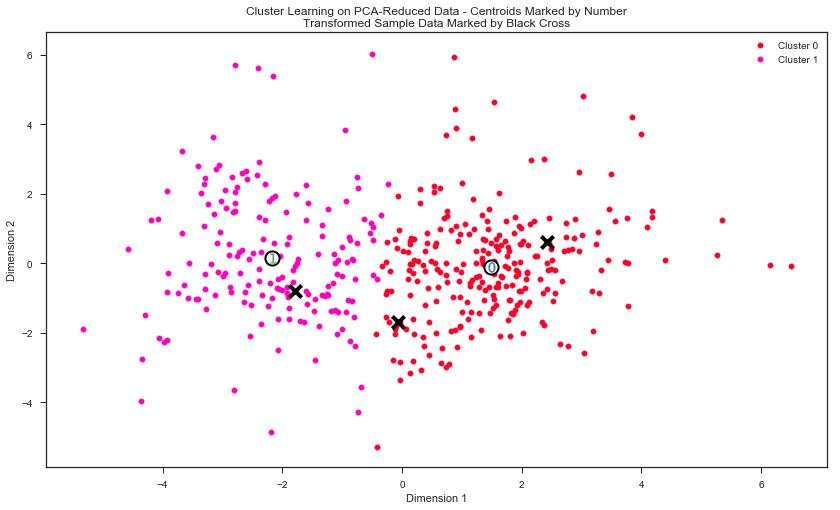

In [35]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Since the data is currently reduced in dimension and scaled by a logarithm, data should be recovered:

In [36]:
log_centers = pca_2.inverse_transform(centers)

true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


## Conclusion

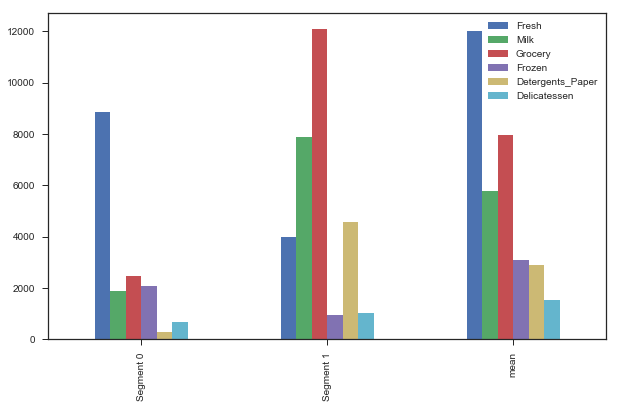

In [37]:
mean_data = data.describe().loc['mean']

segments_plus_mean = true_centers.append(mean_data)

segments_plus_mean.plot(kind = 'bar', figsize=(10,6))


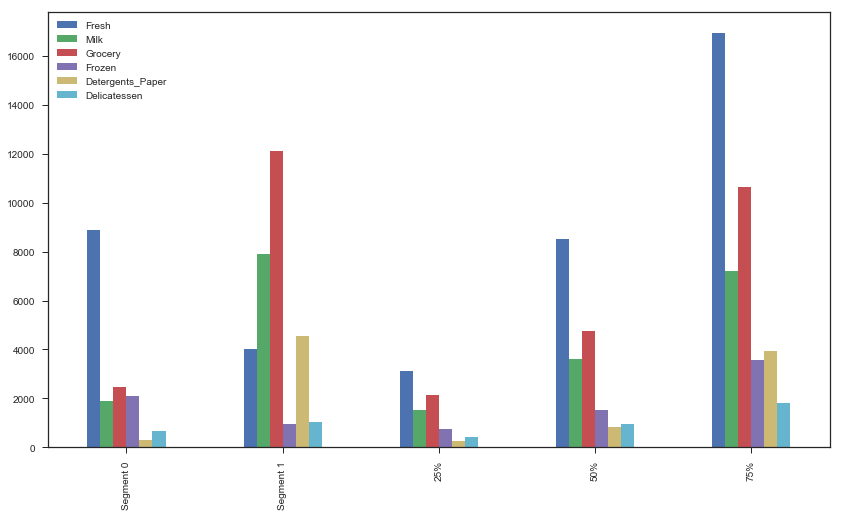

In [38]:
twenty_five = data.describe().loc['25%']
fifty = data.describe().loc['50%']
seventy_five = data.describe().loc['75%']

segments_plus_25 = true_centers.append(twenty_five)
segments_plus_25_50 = segments_plus_25.append(fifty)
segments_plus_25_50_75= segments_plus_25_50.append(seventy_five)

segments_plus_25_50_75.plot (kind = 'bar', figsize=(14,8))


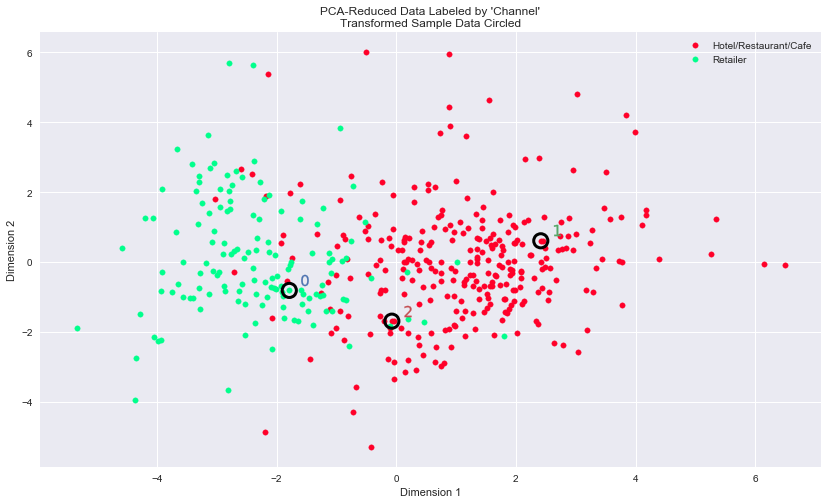

In [38]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)